In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *
import pdb

In [2]:
ds_sst = xr.open_dataset('SST_area_zonmean.nc')
wei_sst = np.cos(np.deg2rad(ds_sst.sst.lat)) / np.cos(np.deg2rad(ds_sst.sst.lat)).mean(dim='lat')
sst_sea = (ds_sst.sst).groupby('time.season').mean()
ds_pr = xr.open_dataset('Precip_area_zonmean.nc')
ds_rh = xr.open_dataset('rela_humidity_area_zonmean.nc')

In [3]:
##Seasons
ssts=[sst_sea[0],sst_sea[2],sst_sea[1],sst_sea[3]]

wei_pr = np.cos(np.deg2rad(ds_pr.Precip.lat)) / np.cos(np.deg2rad(ds_pr.Precip.lat)).mean(dim='lat')
pr_sea = (ds_pr.Precip).groupby('time.season').sum()/6
prs=[pr_sea[0],pr_sea[2],pr_sea[1],pr_sea[3]]

wei_rh = np.cos(np.deg2rad(ds_rh.r.lat)) / np.cos(np.deg2rad(ds_rh.r.lat)).mean(dim='lat')
rh_sea = (ds_rh.r).groupby('time.season').mean()
rhs=[rh_sea[0],rh_sea[2],rh_sea[1],rh_sea[3]]


In [4]:
### Maybe is better if we first divide by regions, so these are the region coordinates
ds_rh_full = xr.open_dataset('RH_area.nc')
stas = [9,8,7,6,5,4,3]
end = [8,7,6,5,4,3,2]
stas = [3,4,5,6,7,8,9]
end = [2,3,4,5,6,7,8]

means = {}
seas_line = {}
for i,sta in enumerate(stas):
    tmp = ds_rh_full.r.sel(latitude=slice(sta,end[i]))
    sea_tmp = tmp.groupby('time.season').mean()
    means[str(sta)+'-'+str(end[i])] = (tmp.mean(dim=['longitude','latitude','time']).values)
    seas_line[str(sta)+'-'+str(end[i])] = sea_tmp.mean(dim=['longitude','latitude'])
    del(tmp);del(sea_tmp)

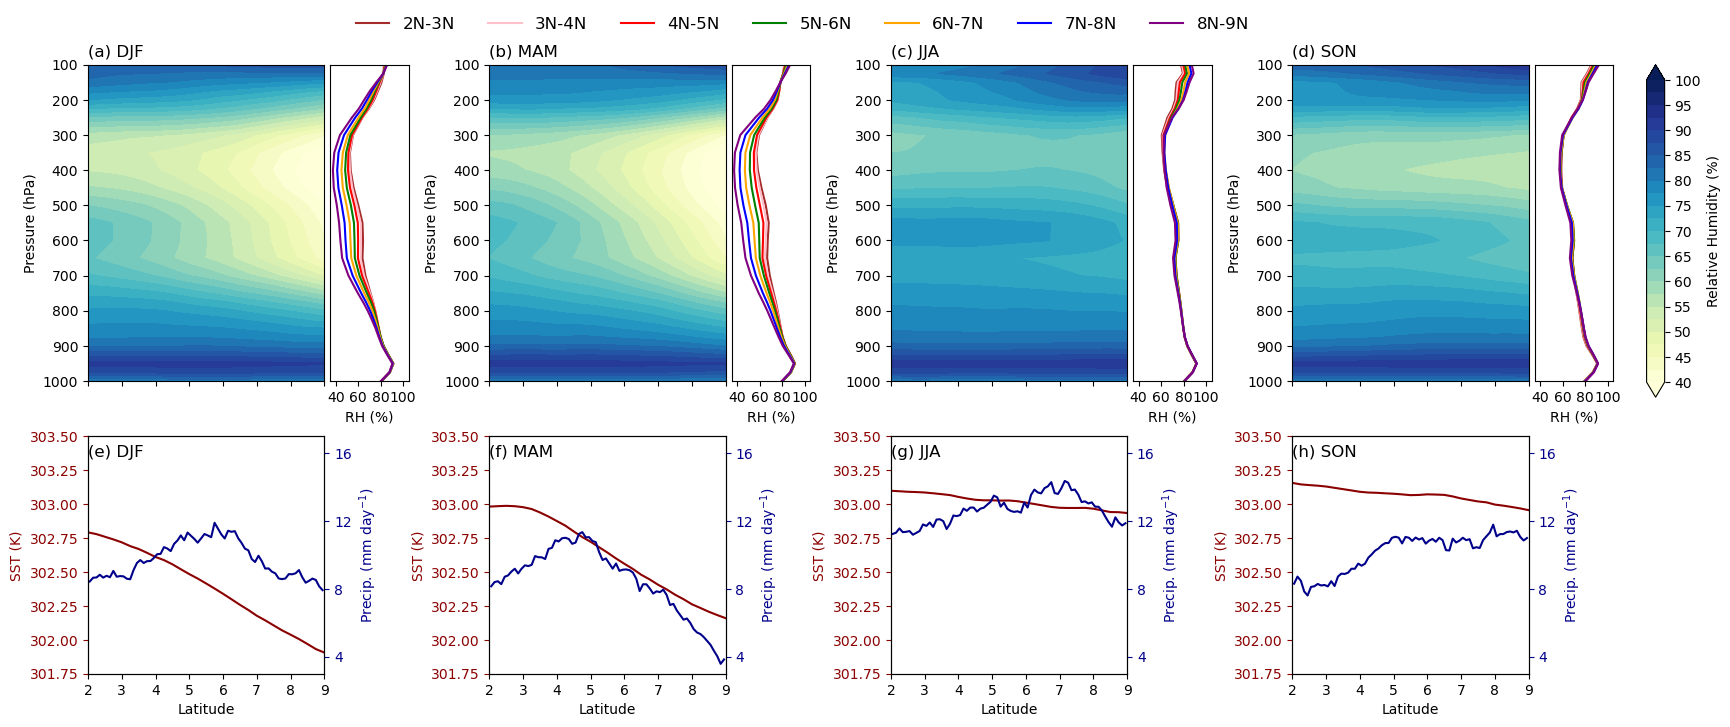

In [5]:
##### Starting plot
seasons = ['(e) DJF','(f) MAM','(g) JJA','(h) SON']
x = np.arange(2,9.01,0.1)
xs = [0.15,0.17,0.13,0.16]
titulos = ['(a) DJF','(b) MAM','(c) JJA','(d) SON']

fig = plt.figure(figsize=(20,7)) 
gs = GridSpec(2,14,left = 0.09, right = 0.95, hspace=0.2, wspace=0.05, top = 0.95, bottom = 0.08, 
              height_ratios = [1,0.75], 
              width_ratios = [1.2,0.4,0.35,1.2,0.4,0.35,1.2,0.4,0.35,1.2,0.4,0.35,0.2,0.35])

for i,rh in enumerate(rhs):
    ax = plt.subplot(gs[0,i*3])
    im = plt.contourf(rh.lat,rh.level,rh.mean(dim='lon'), cmap = 'YlGnBu', levels=np.arange(40,100.01,2.5), 
                      extend = 'both')
    plt.ylabel('Pressure (hPa)')
    #plt.xlabel('Latitude')
    plt.ylim(1000,100)
    plt.xticks(np.arange(2,9.1,1))
    ax.xaxis.set_major_formatter(NullFormatter())
    plt.title(titulos[i], fontsize =12, loc = 'left')

gs1 = GridSpec(1,14)
gs1.update(left=0.75, right = 0.9, top= 0.95, bottom=0.475)
ax = plt.subplot(gs1[0,11])
cbar = plt.colorbar(im, cax = ax, ticks = np.arange(40,100.01,5))
cbar.set_label('Relative Humidity (%)') 

temps = ['DJF','MAM','JJA','SON']
pos_plt = [1,4,7,10]
posi = [0,2,1,3]
colors = ['purple','blue','orange','green','red','pink','brown']
colors = ['brown','pink','red','green','orange','blue','purple']

for j,sea in enumerate(temps):
    ax = plt.subplot(gs[0,pos_plt[j]])
    for i,sta in enumerate(stas):
        plt.plot(seas_line[str(sta)+'-'+str(end[i])][posi[j]],rhs[0].level, 
                 label=str(end[i])+'N-'+str(sta)+'N', color = colors[i])
    ax.yaxis.set_tick_params(labelleft=False)
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.xlabel('RH (%)')
    plt.xticks([40,60,80,100])
    plt.xlim(35,105)
    plt.ylim(1000,100)
    ax.tick_params(axis='y', length = 0)
    if j == 1:
        plt.legend(frameon=False, loc='upper center', bbox_to_anchor = (0.9,1.2), ncol=7, fontsize = 12)

for i,sst in enumerate(ssts):
    ax = plt.subplot(gs[1,i*3])
    ax.plot(sst.lat.values,sst, color = 'darkred')
    plt.ylim(301.75,303.5)
    if i >= 0:
        ax.set_ylabel('SST (K)', color = 'darkred')
    else:
        ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.label.set_color('darkred')
    plt.xticks(np.arange(2,9.1,1))
    plt.xlabel('Latitude')
    plt.xlim(2,9)
    ax.tick_params(axis='y', colors = 'darkred')
    ax2 = ax.twinx()
    ax2.plot(pr_sea.lat.values,prs[i]/90, color = 'darkblue')
    plt.yticks(np.arange(0,16.01,4))
    plt.ylim(3,17)
    #plt.ylim(20,60)
    #plt.yticks(np.arange(25,55.01,5))
    plt.xticks(np.arange(2,9.1,1))
    plt.xlabel('Latitude')
    ax2.set_ylabel('Precip. (mm day$^{-1}$)', color = 'darkblue')
    ax2.yaxis.label.set_color('darkblue')
    ax2.tick_params(axis='y', colors = 'darkblue')
    plt.title(seasons[i], loc= 'left', y=0.88, fontsize = 12)
plt.savefig('SST_hum_rain_sea_hor_new.jpg', bbox_inches='tight', dpi = 300)
plt.savefig('SST_hum_rain_sea_hor_new.pdf', bbox_inches='tight', dpi = 300)
plt.show()
plt.close()

## Organized and reversal cases

In [6]:
###################################
##### Organized and reversals #####
###################################
def sum_them(ds_tcwv,ds_sst,ds_rh,dates):
    datasets = {'Precip':[], 'SST':[], 'RH':[]}
    for i,date in enumerate(dates):
        datasets['Precip'].append(ds_tcwv.Precip.loc[date[0:10]])
        datasets['SST'].append(ds_sst.sst.loc[date])
        datasets['RH'].append(ds_rh.r.loc[date])
    ###Means
    #Precip
    pr_rev = xr.concat(datasets['Precip'], dim='time')
    #SST
    sst_rev = xr.concat(datasets['SST'], dim='time')
    #RH
    rh_rev = xr.concat(datasets['RH'], dim='time')
    return(pr_rev,sst_rev,rh_rev)

def sel_season(data,sta,med,end):
    tmp = data[data.index.month.isin([sta,med,end])]
    new_df = tmp.index.strftime('%Y-%m-%d %H:%M:%S').values
    return(new_df)

def sel_boreal(data,dic,ene,feb,ini,med,end):
    tmp = data[data.index.month.isin([dic,ene,feb,ini,med,end])]
    new_df = tmp.index.strftime('%Y-%m-%d %H:%M:%S').values
    return(new_df)

In [8]:
### Dates
import pandas as pd
import sys
latitude = '2-9'
longitude = '135-145'
mdir = '/Users/acasalla/Documents/PhD/Thesis/NN_real/'
file_rev = 'Dates_'+latitude+'_'+longitude+'_reversals.csv'
file_org = 'Dates_'+latitude+'_'+longitude+'_organised.csv'

dates_rev = pd.read_csv(mdir+'Area_'+latitude+'_'+longitude+'_ERA5/'+file_rev, 
                        parse_dates = True, index_col = 0)
dates_org = pd.read_csv(mdir+'Area_'+latitude+'_'+longitude+'_ERA5/'+file_org, 
                        parse_dates = True, index_col = 0)

dat_rev = dates_rev.index.strftime('%Y-%m-%d %H:%M:%S').values
dat_org = dates_org.index.strftime('%Y-%m-%d %H:%M:%S').values

dat_org = sel_boreal(dates_org,12,1,2,3,4,5)
dat_rev = sel_boreal(dates_rev,12,1,2,3,4,5)

print('##### Selecting reversal days #####')
pr_rev,sst_rev,rh_rev = sum_them(ds_pr,ds_sst,ds_rh,dat_rev)
print('##### Selecting organized days #####')
pr_org,sst_org,rh_org = sum_them(ds_pr,ds_sst,ds_rh,dat_org)

##### Selecting reversal days #####
##### Selecting organized days #####


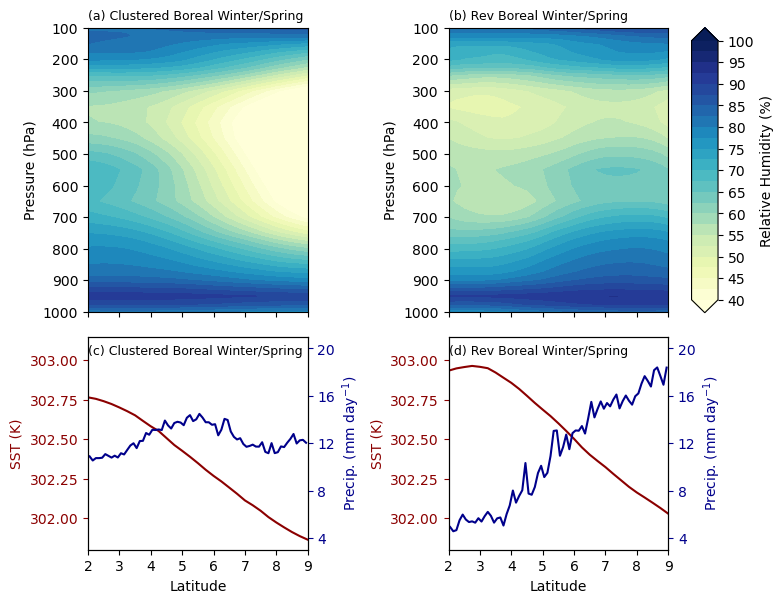

In [12]:
prs = [pr_org.mean(dim=['time','lon']),pr_rev.mean(dim=['time','lon'])]
ssts = [sst_org.mean(dim = ['time','lon']),sst_rev.mean(dim = ['time','lon'])] 
rhs = [rh_org.mean(dim=['time','lon']),rh_rev.mean(dim=['time','lon'])]

title = ['(c) Clustered Boreal Winter/Spring','(d) Rev Boreal Winter/Spring']
tituls = ['(a) Clustered Boreal Winter/Spring','(b) Rev Boreal Winter/Spring']

fig = plt.figure(figsize=(9,6)) #8,16
gs = GridSpec(2,3,left = 0.1, right = 0.95, hspace=0.1, wspace=0.875, top = 0.95, bottom = 0.08, 
              height_ratios = [1,0.75], width_ratios = [1,1,0.2])

for i,rh in enumerate(rhs):
    ax = plt.subplot(gs[0,i])
    im = plt.contourf(rh.lat,rh.level,rh, cmap = 'YlGnBu', levels=np.arange(40,100.01,2.5), extend = 'both')
    plt.ylabel('Pressure (hPa)')
    plt.xticks(np.arange(2,9.01,1))
    plt.ylim(1000,100)
    plt.title(tituls[i], fontsize =9, loc = 'left')
    ax.xaxis.set_major_formatter(NullFormatter())

gs1 = GridSpec(1,3)
gs1.update(left=0.7, right = 0.8, top= 0.95, bottom=0.475)
ax = plt.subplot(gs1[0,2])
cbar = plt.colorbar(im, cax=ax, ticks = np.arange(40,100.01,5))
cbar.set_label('Relative Humidity (%)')

for i,sst in enumerate(ssts):
    ax = plt.subplot(gs[1,i])
    ax.plot(sst.lat.values,sst, color = 'darkred')
    plt.ylim(301.8,303.15)
    plt.yticks(np.arange(302.0,303.01,0.25))
    ax.set_ylabel('SST (K)', color = 'darkred')
    ax.yaxis.label.set_color('darkred')
    plt.xticks(np.arange(2,9.1,1))
    plt.xlabel('Latitude')
    plt.xlim(2,9)
    ax.tick_params(axis='y', colors = 'darkred')
    ax2 = ax.twinx()
    ax2.plot(pr_sea.lat.values,prs[i]/3, color = 'darkblue')
    #plt.yticks(np.arange(400,1200.01,200))
    plt.yticks(np.arange(0,20.01,4))
    plt.ylim(3,21)
    plt.xticks(np.arange(2,9.1,1))
    plt.xlabel('Latitude')
    ax2.set_ylabel('Precip. (mm day$^{-1}$)', color = 'darkblue')
    ax2.yaxis.label.set_color('darkblue')
    ax2.tick_params(axis='y', colors = 'darkblue')
    plt.title(title[i], loc='left', y=0.88, fontsize = 9)
plt.savefig('SST_rain_RH_rev_org_MAM_hor.jpg', bbox_inches='tight', dpi = 300)
plt.savefig('SST_rain_RH_rev_org_MAM_hor.pdf', bbox_inches='tight', dpi = 300)

plt.show()
plt.close()